#### Description
The dataset is a collection of information about patients appointments in Brazil with focus on keeping to the appointments by the patients.
#### Question
Using the data, we need to determine the important factors that can help in predicting if a patient will show up for their scheduled appointment.
#### Steps
    1.Import the necessary libraries and load dataset
    2.Get basic information about the dataset.
    3.Clean the dataset
        i.Correct the datatype for the necessary columns.
        ii.Rename columns if necessary
        iii.Drop rows that are not relevant to the analysis.
    4.Analyse and use visualizations to answer the project questions.

###### Import the necessary libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('appointments.csv')

##### Basic Information about the dataset

In [172]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [173]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [174]:
df.shape

(110527, 14)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information above, it can be seen that:

    i.there is no missing values in any of the columns;
    ii.of the 14 columns, 8 are integers, 1 is float and five are objects

#### Clean the dataset
    i.Correct the datatype for the necessary columns.
    ii.Rename columns if necessary
    iii.Check for duplicated rows
    iv.Drop rows that are not relevant to the analysis.

In [176]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Observations

    i.PatientID is float. Convert to int.
    ii.ScheduleDay and Appointmentday are objects. Converts to dates.
    iii.Correct wrong column names and anc change SMS_received and No-show for consistency with others.
    iv.All the appointment days have 00:00:00 timestamp. That will be ignored. Only the          dates will be needed. Similarly, the time part of the ScheduledDay will be ignored.

In [177]:
#Convert PatientID to int
df.PatientId = df.PatientId.astype('int64')

In [178]:
#Convert ScheduleDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
print(df.AppointmentDay.dtypes)
print(df.ScheduledDay.dtypes)
print(df[['ScheduledDay', 'AppointmentDay']].head(1))

datetime64[ns, UTC]
datetime64[ns, UTC]
               ScheduledDay            AppointmentDay
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00


In [179]:
#Use dt.date attribute to get rid of the time portion
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
print(df[['ScheduledDay', 'AppointmentDay']].head(2))

  ScheduledDay AppointmentDay
0   2016-04-29     2016-04-29
1   2016-04-29     2016-04-29


In [180]:
#Rename columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [181]:
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received':'SMSReceived', 'No-show':'NoShow'}, inplace = True)

In [182]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [206]:
#Check for duplicated rows
df.duplicated().sum()

0

In [207]:
#Summarise the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [208]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The minimum age in the dataset is -1 (which is not a valid age). To check it further:

In [186]:
df.query("Age == -1").shape[0]

1

There is only one row with age -1. 

In [187]:
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Since Age cannot be negative, the row can be dropped using the index number

In [188]:
#df.drop(df.index[99832], inplace = True)

In [189]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [190]:
df.shape

(110526, 14)

Select the ages in ascending order

In [214]:
np.sort(df.Age.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [280]:
df.groupby('Age').count()['PatientId']

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: PatientId, Length: 103, dtype: int64

In [ ]:
3539 of the patients are between 1 to 11 months old. Since they are infants, let check if they

Create a new column for the months for each scheduled appointment. This will help understand the number pf scheduled appointments per month.

In [263]:
df['Month'] = pd.DatetimeIndex(df['ScheduledDay']).month

In [264]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Month
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4


In [269]:
df.groupby('Month').count()['Age']

Month
1        60
2       281
3      3614
4     25339
5     67421
6     13749
11        1
12       61
Name: Age, dtype: int64

In [277]:
theDF = df.groupby(['Month', 'NoShow']).count()['Age']
theDF

Month  NoShow
1      No           42
       Yes          18
2      No          199
       Yes          82
3      No         2418
       Yes        1196
4      No        17490
       Yes        7849
5      No        55652
       Yes       11769
6      No        12363
       Yes        1386
11     No            1
12     No           42
       Yes          19
Name: Age, dtype: int64

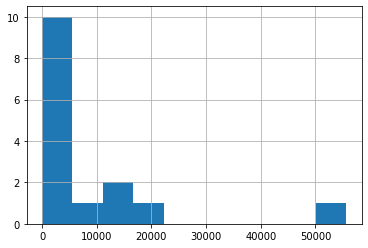

In [278]:
theDF.hist()

In [237]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [253]:
df.groupby(['Age', 'Diabetes', 'Hypertension']).count()['PatientId']

Age  Diabetes  Hypertension
0    0         0               3539
1    0         0               2272
     1         0                  1
2    0         0               1617
     1         0                  1
                               ... 
99   1         1                  1
100  0         0                  4
102  0         0                  2
115  0         0                  4
               1                  1
Name: PatientId, Length: 359, dtype: int64

In [261]:
pd.DatetimeIndex(df['ScheduledDay']).month.unique()

Int64Index([4, 3, 2, 1, 5, 11, 12, 6], dtype='int64', name='ScheduledDay')

.apply(lambda x: calendar.month_abbr[x]

### Visualizations
#### The different columns will be used to analyse visualise the 

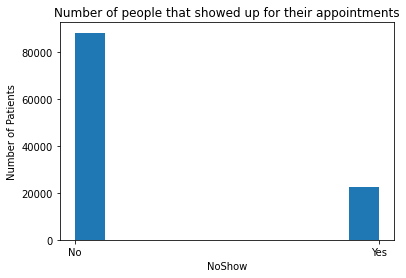

In [287]:
#Plotting the Show/NoShow in a histogram
plt.hist(df.NoShow)
plt.xlabel('NoShow')
plt.ylabel('Number of Patients')
plt.title('Number of people that showed up for their appointments')
plt.show()

ConversionError: Failed to convert value(s) to axis units: 0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: NoShow, Length: 110526, dtype: object

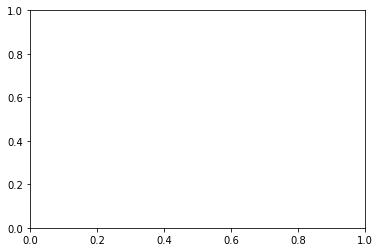

In [297]:
plt.hist(df.SMSReceived, df.NoShow)

In [296]:
df.groupby(['PatientId', 'Alcoholism', 'Hypertension', 'Scholarship', 'Diabetes', 'Handicap', 'SMSReceived'])['Gender'].count()

PatientId        Alcoholism  Hypertension  Scholarship  Diabetes  Handicap  SMSReceived
39217            0           0             0            0         0         0              1
43741            0           0             0            1         0         0              1
93779            0           0             0            0         0         0              1
141724           0           0             0            0         0         0              1
537615           0           0             0            0         0         1              1
                                                                                          ..
999931985292928  0           0             0            0         0         1              2
999934989273974  0           0             0            0         0         0              1
999946536742891  0           1             1            0         0         0              1
999968578354866  0           0             0            0         0        